## Обзорная экскурсия по работе алгоритма

In [10]:
from figure_detection import *
from intelligent_placer import slide_obj_over_fig

Загрузим картинки и выведем их на экран

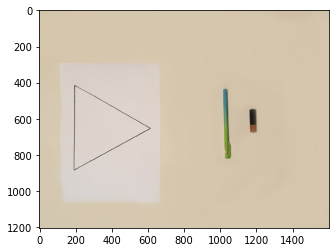

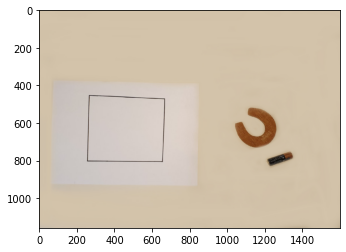

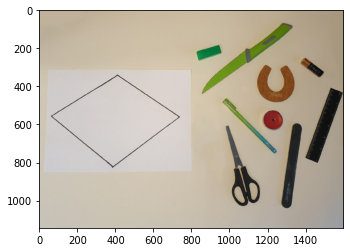

In [26]:
im = load_images()

for i in im:
    plt.imshow(i)
    plt.show()

Найдём контуры многоугольников на картинках:

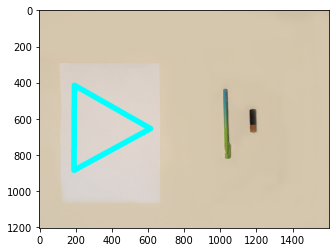

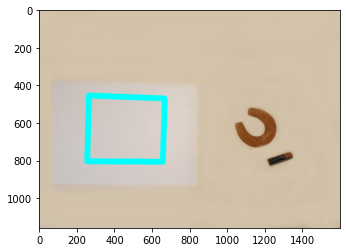

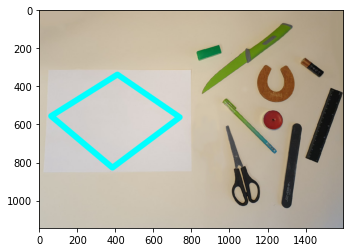

In [27]:
cont = find_figure_contour(im)

for i in cont:
    plt.imshow(i)
    plt.show()

Создадим маску для нашего многоугольника

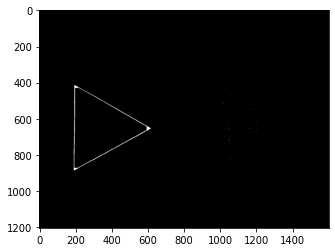

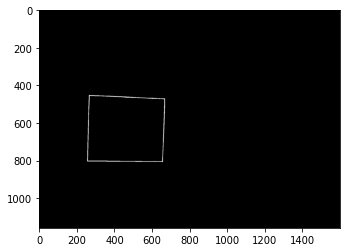

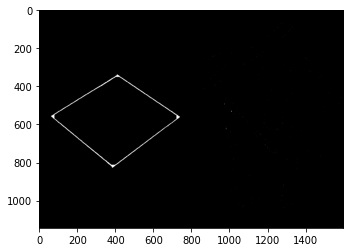

In [28]:
mask_fig = create_mask_figure(im)

for i in mask_fig:
    plt.imshow(i)
    plt.gray()
    plt.show()

Закрасим многоугольники внутри границ:

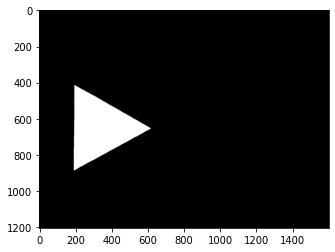

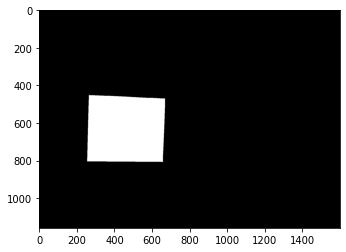

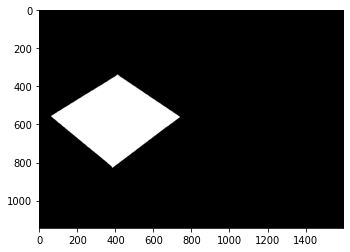

In [29]:
fill_mask = fill_mask_figure(mask_fig)

for i in fill_mask:
    plt.imshow(i)
    plt.gray()
    plt.show()

Теперь найдем для каждого многоугольника bbox, который его содержит. Обрежем маски:

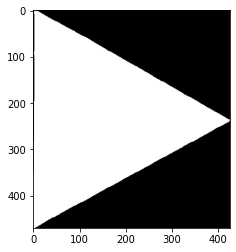

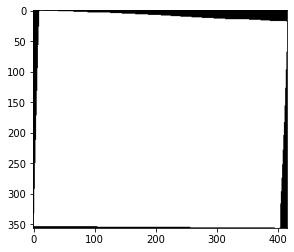

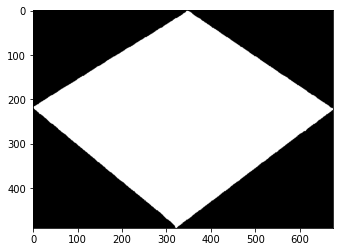

In [30]:
bbox, _ = create_bbox(fill_mask)
tr = truncate_mask(fill_mask, bbox)

for i in tr:
    plt.imshow(i)
    plt.gray()
    plt.show()

УРАА!! на данном этапе у нас готово распознавание многоугольника :)

Займёмся объектами

Создадим маску изображения, которая не будет содержать маску многоугольника:

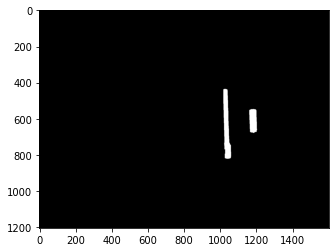

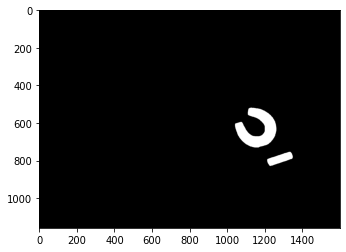

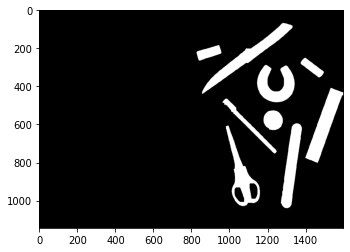

In [31]:
mask_without_fig = create_mask_without_figure(cont)

for i in mask_without_fig:
    plt.imshow(i)
    plt.gray()
    plt.show()

Теперь по аналогии с многоугольником, на каждой маске будем брать по одному объекту, находить его bbox и обрезать маску, также понадобится находить площадь объектов. На выходе получим массив содержащий маски всех объектов

In [32]:
masks_for_objects, object_areas = create_masks_for_objects(mask_without_fig)

Ревёрснем получившиеся маски

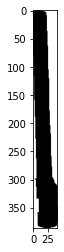

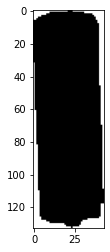

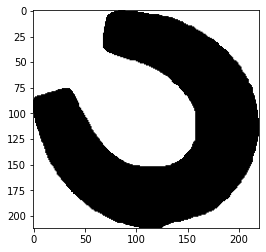

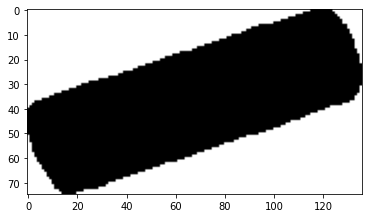

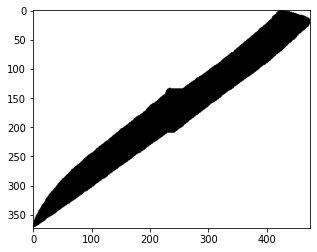

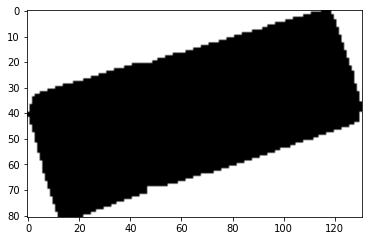

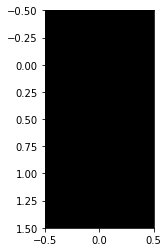

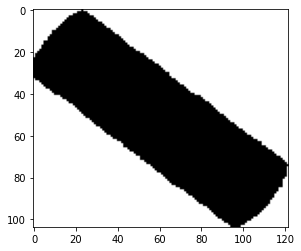

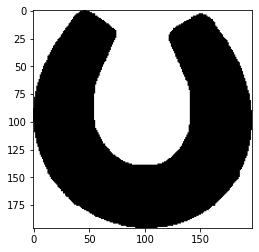

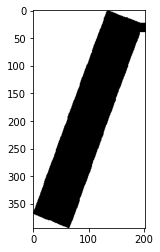

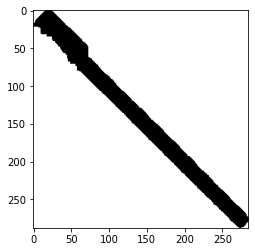

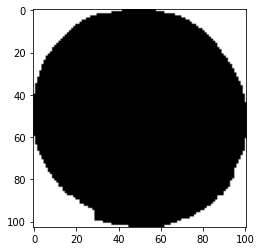

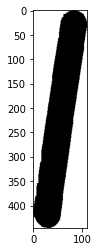

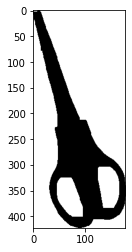

In [33]:
masks_for_objects = reverse_object_masks(masks_for_objects)
show_obj(masks_for_objects)

Ура, товарищи. Теперь у нас есть и маска многоугольника и маски объектов. Теперь осталось проверить, можно ли объекты разместить в многоугольнике с помощью параллельного переноса:

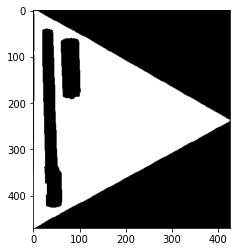

1 Yes


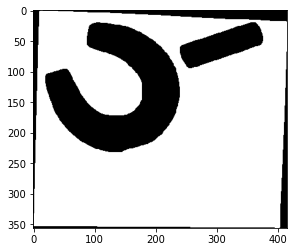

2 Yes
3 No


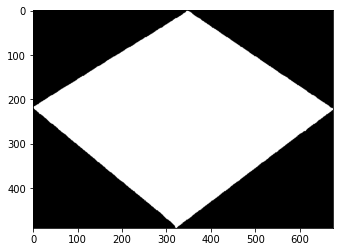

3 Yes


In [34]:
object_loc = []
answer = []
i = 1

for main_fig, obj, obj_area in zip(tr, masks_for_objects, object_areas):
    for ob, area in zip(obj, obj_area):
        (y, x), result = slide_obj_over_fig(main_fig, ob, area)
        object_loc.append([y, x])

        if x == -1:
            print(i, "No")
            break

    plt.imshow(result, cmap='gray')
    plt.show()
    print(i, "Yes")
    answer.append(result)
    i += 1

В целом видим, что алгоритм три раза отработал верно, но что он выдает в конце снова по третьему testcas-у я еще не разобралась. Будет что исправлять ко второй итерации.

Планы на вторую итерацию:
1. переделать пункт "сбор данных", так как алгоритм очень чувствителен к теням и бликам (многие фотографии подлежат перефотографированию)
2. разделить код на модули (сейчас этому уделено мало времени)
3. сопроводить код комментариями (будут на русском, мне так комфортнее)
4. добавить для каждой функции описание входных и выходных аргументов
5. пофиксить ошибку, обнаруженную выше
6. На большом репрезентативном наборе данных протестировать алгоритм
7. Вычислить метрики качества работы алгоритма
8. Составить отчёт о проделанной работе